In [10]:
# todo:
# comment/explain fixed ffdx section
# add to regular python script
# change python script to allow for fixed or cumsum graph
# get actual Epoint value
# get glob to work from within 'KICs'
# return,[[n*(1.-1./(9.*n)-1./(3.*sqrt(n)))^3.-n],[n+sqrt(n+0.75)+1.0-n]]

#use glob once in KIC but list all KICs in list

In [22]:
%matplotlib inline
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

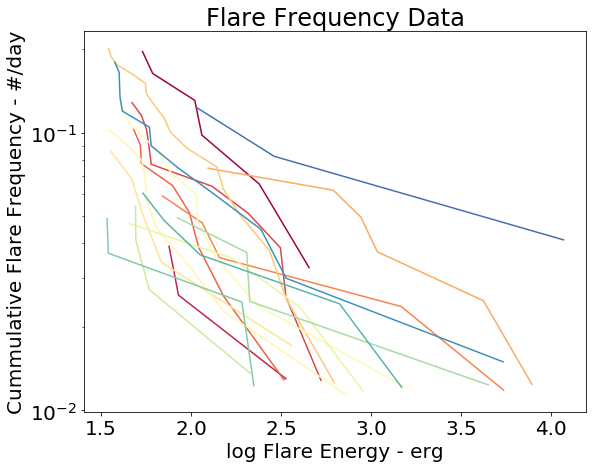

In [24]:
#plotting a reverse cummulative sum for a single KIC# number, hoping for a smooth change in frequency over time
#plotting only the significant data

dir = '004349043' #KIC#/directory
files = glob('KICs/' + dir + "/*.flare") #Glob all of the files in the directory - get all flares for a star
EPOINT = 0 # need to fix this
names=("t_start", "t_stop", "t_peak", "amplitude", "FWHM", "duration", "t_peak_aflare1", 
       "t_FWHM_aflare1", "amplitude_aflare1", "flare_chisq", "KS_d_model", "KS_p_model", 
       "KS_d_cont", "KS_p_cont", "Equiv_Dur", "ED68i", "ED90i")


plt.figure(figsize=(9,7))
plt.yscale('log')
plt.xlabel("log Flare Energy - erg")
plt.ylabel("Cummulative Flare Frequency - #/day")
plt.title("Flare Frequency Data")
cmap = plt.cm.Spectral # color scheme -- visible color spectrum, starting with red as the earliest
plt.rcParams.update({'font.size': 24})
np.seterr(invalid='ignore')#ignore the Nans


for x in range(len(files)):
    
    toteDur = pd.read_table(files[x], skiprows=5, nrows=1, header=None, 
                            delim_whitespace=True, usecols=(7,)
                           ).iloc[0].values[0] #getting the total duration of each file
    
    df = pd.read_table(files[x], comment="#", delimiter=",", names=names)
    energy = df['Equiv_Dur'] # This is the energy column of the flare data
    sort = np.argsort(energy) #get indices that would sort the energy array

    ffd_xEnergy = np.log10(energy[sort][::-1]) + EPOINT #log the reverse of sorted energy
    ffd_yFrequency = (np.arange(1, len(ffd_xEnergy)+1, 1))/toteDur #get evenly spaced intervals, divide by totedur to get flares/day
    ok68 = ffd_xEnergy >= np.log10(np.median(df['ED68i'])) + EPOINT #use ED68i to get indices of useful data, ignore the junk
    
    plt.plot(ffd_xEnergy[ok68], ffd_yFrequency[ok68], c = cmap(x/float(len(files))))#  c = # color scheme -- visible color spectrum, starting with red as the earliest


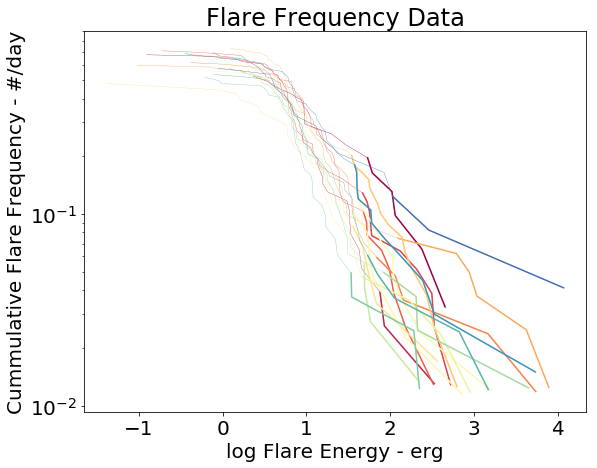

In [20]:
#plotting a reverse cummulative sum for a single KIC# number, hoping for a smooth change in frequency over time
#plotting all of the data, with data below the ED68i cutoff being the thinner lines

dir = '004349043' #StarID/directory
files = glob(dir+"/*.flare") #Glob all of the files in the directory - get all flares for a star
EPOINT = 0 #should fix this
names=("t_start", "t_stop", "t_peak", "amplitude", "FWHM", "duration", "t_peak_aflare1", 
       "t_FWHM_aflare1", "amplitude_aflare1", "flare_chisq", "KS_d_model", "KS_p_model", 
       "KS_d_cont", "KS_p_cont", "Equiv_Dur", "ED68i", "ED90i")


plt.figure(figsize=(9,7))
plt.yscale('log')
plt.xlabel("log Flare Energy - erg")
plt.ylabel("Cummulative Flare Frequency - #/day")
plt.title("Flare Frequency Data")
cmap = plt.cm.Spectral # color scheme -- visible color spectrum, starting with red as the earliest
plt.rcParams.update({'font.size': 20})
np.seterr(invalid='ignore')#ignore the Nans


for x in range(len(files)):
    
    toteDur = pd.read_table(files[x], skiprows=5, nrows=1, header=None, 
                            delim_whitespace=True, usecols=(7,)
                           ).iloc[0].values[0]  #getting the total duration of each file
        
    df = pd.read_table(files[x], comment="#", delimiter=",", names=names)
    energy = df['Equiv_Dur'] #This is the energy column of the flare data
    sort = np.argsort(energy) #get indices that would sort the energy array

    ffd_xEnergy = np.log10(energy[sort][::-1]) + EPOINT #log the reverse of sorted energy
    ffd_yFrequency = (np.arange(1, len(ffd_xEnergy)+1, 1))/toteDur #get evenly spaced intervals, divide by totedur to get flares/day

    ok68 = ffd_xEnergy >= np.log10(np.median(df['ED68i'])) + EPOINT #use ED68i to get indices of useful data, ignore the junk
    
    plt.plot(ffd_xEnergy, ffd_yFrequency, lw = .35, c = cmap(x/float(len(files)))) #all data
    plt.plot(ffd_xEnergy[ok68], ffd_yFrequency[ok68], c = cmap(x/float(len(files)))) #significant data
    plt.savefig('figures/' + dir+'_whole_FFD.png')


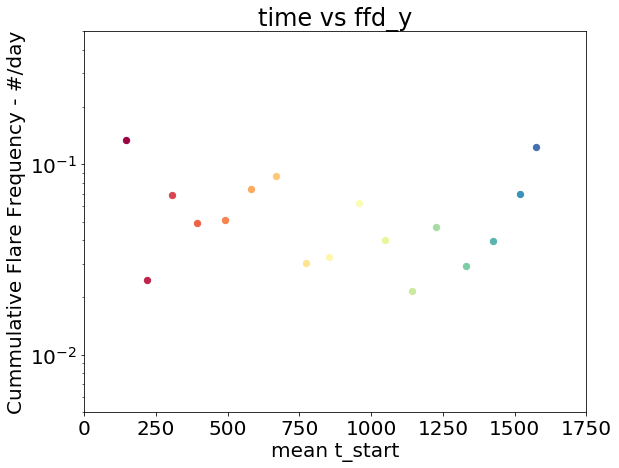

In [18]:
#two values from each file, mean of tstart, ffd_y associated with a fixed energy ffd_x. 
#pick an x value and for every file report the corresponding y value and then plot the avg start 
#time against the y value. Tip: use np.interp to get the FFD_Y value that exactly corresponds to 
#a specific FFD_X

dir = '004349043' #KIC#/directory
files = glob(dir+"/*.flare") #Glob all of the files in the directory - get all flares for a star
EPOINT = 0 # need to fix this
names=("t_start", "t_stop", "t_peak", "amplitude", "FWHM", "duration", "t_peak_aflare1", 
       "t_FWHM_aflare1", "amplitude_aflare1", "flare_chisq", "KS_d_model", "KS_p_model", 
       "KS_d_cont", "KS_p_cont", "Equiv_Dur", "ED68i", "ED90i")


plt.figure(figsize=(9,7))
plt.ylabel("Cummulative Flare Frequency - #/day")
plt.xlabel("mean t_start")
plt.title("time vs ffd_y")
plt.yscale('log')
plt.ylim([0.005,0.5])
plt.xlim([0,1750])

cmap = plt.cm.Spectral # color scheme -- visible color spectrum, starting with red as the earliest
np.seterr(invalid='ignore')#ignore the Nans
logEnergyConstant = 2.

for x in range(len(files)):
    
    toteDur = pd.read_table(files[x], skiprows=5, nrows=1, header=None, 
                            delim_whitespace=True, usecols=(7,)
                           ).iloc[0].values[0]  #getting the total duration of each file
        
    df = pd.read_table(files[x], comment="#", delimiter=",", names=names)
    energy = df['Equiv_Dur'] #This is the energy column of the flare data
    sort = np.argsort(energy) #get indices that would sort the energy array
    

    ffd_xEnergy = np.log10(energy[sort][::-1]) + EPOINT #log the reverse of sorted energy
    ffd_yFrequency = (np.arange(1, len(ffd_xEnergy)+1, 1))/toteDur #get evenly spaced intervals, divide by totedur to get flares/day

    if(np.amax(ffd_xEnergy) >= logEnergyConstant >= np.amin(ffd_xEnergy)):
       
        ok68 = ffd_xEnergy >= np.log10(np.median(df['ED68i'])) + EPOINT #use ED68i to get indices of useful data, ignore the junk

        meanstart = np.sum(df['t_start'])/len(df['t_start']) #finding the mean time for a file
        ffd_yForMeanstart = np.interp(logEnergyConstant, ffd_xEnergy[ok68][::-1], ffd_yFrequency[ok68][::-1])

        plt.scatter(meanstart, ffd_yForMeanstart, s=40, c = cmap(x/float(len(files)))) #all data
        plt.savefig(dir+'_vs_time.png')

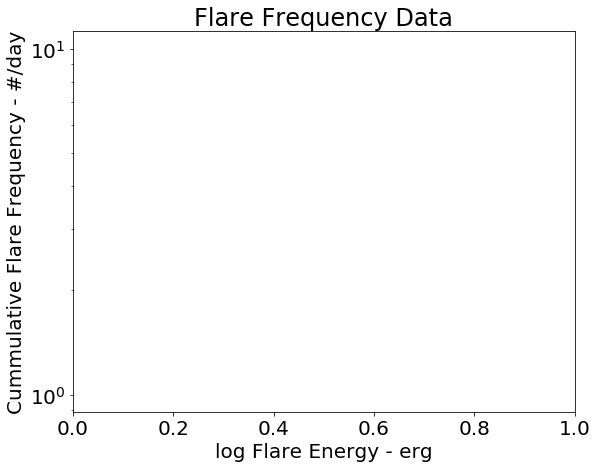

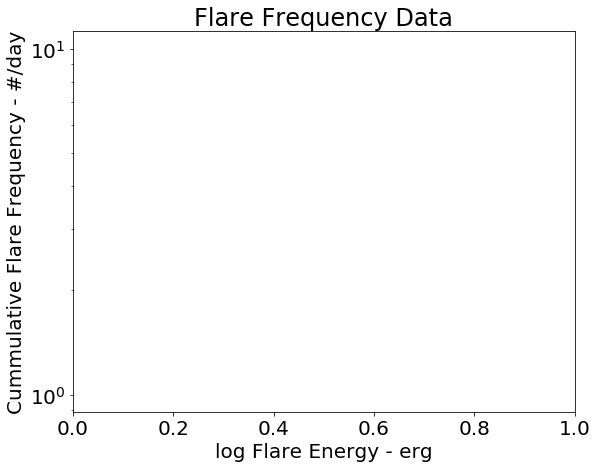

In [9]:
##to be used from terminal ----python flaregraphs.py KIC# KIC# ----
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

for y in range(len(sys.argv) - 1):

    dir = sys.argv[y+1] #StarID/directory
    files = glob(dir+"/*.flare") #Glob all of the files in the directory - get all flares for a star
    EPOINT = 0 # need to fix this
    names=("t_start", "t_stop", "t_peak", "amplitude", "FWHM", "duration", "t_peak_aflare1", 
           "t_FWHM_aflare1", "amplitude_aflare1", "flare_chisq", "KS_d_model", "KS_p_model", 
           "KS_d_cont", "KS_p_cont", "Equiv_Dur", "ED68i", "ED90i")


    plt.figure(figsize=(9,7))
    plt.yscale('log')
    plt.xlabel("log Flare Energy - erg")
    plt.ylabel("Cummulative Flare Frequency - #/day")
    plt.title("Flare Frequency Data")
    cmap = plt.cm.Spectral # color scheme -- visible color spectrum, starting with red as the earliest
    np.seterr(invalid='ignore')#ignore the Nans


    for x in range(len(files)):

        toteDur = pd.read_table(files[x], skiprows=5, nrows=1, header=None, 
                                delim_whitespace=True, usecols=(7,)
                               ).iloc[0].values[0] #getting the total duration of each file

        df = pd.read_table(files[x], comment="#", delimiter=",", names=names)
        energy = df['Equiv_Dur'] # This is the energy column of the flare data
        sort = np.argsort(energy) #get indices that would sort the energy array

        ffd_xEnergy = np.log10(energy[sort][::-1]) + EPOINT #log the reverse of sorted energy
        ffd_yFrequency = (np.arange(1, len(ffd_xEnergy)+1, 1))/toteDur #get evenly spaced intervals, divide by totedur to get flares/day
        ok68 = ffd_xEnergy >= np.log10(np.median(df['ED68i'])) + EPOINT #use ED68i to get indices of useful data, ignore the junk

        plt.plot(ffd_xEnergy[ok68], ffd_yFrequency[ok68], c = cmap(x/float(len(files)))) #c = visible color spectrum over time, starting with red as the earliest


plt.show()
